#1．Gdriveにマウント

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#2．ライブラリのインポート

In [0]:
#Loading dataset
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import itertools
import pandas as pd

#3．データの取り込み

In [0]:
path = "/content/gdrive/My Drive/Colab Notebooks/GCI2019/competition2/input/"

train = pd.read_csv(path +  'train.csv')
test = pd.read_csv(path +  'test.csv')

##3-1．欠損値の処理

In [0]:
density = pd.concat([train['density'], test['density']])
pH = pd.concat([train['pH'], test['pH']])

train['density'].fillna(density.mean(), inplace=True)
test['density'].fillna(density.mean(), inplace=True)

train['pH'].fillna(pH.mean(), inplace=True)
test['pH'].fillna(pH.mean(), inplace=True)

#4．力任せ探索（テストサイズ、訓練項目）
random_stateもいじると良いかも

In [0]:
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)

In [0]:
a = 0
for i in range(len(a_list)):
  a += len(a_list[i])
a

2047

In [0]:
#初期値の設定
best_score = 0
best_size = 0
best_factor = ""
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
#上の組み合わせ毎で訓練データを抽出
for i in a_list: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    #print('current check: ', j)
    #実際の抽出
    X = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
    #n個の組み合わせ毎に一番良い値とその時のテストサイズを抽出
    better_score = 0 #n個の組み合わせの計算毎にリセットされる
    better_size = 0
    better_factor = ""
  for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=size, random_state=0)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score =  mean_squared_error(y_test, pred_test)
    size =  size
    factor = j
    print('size: {}'.format(size), 'score(mse): {}'.format(score), 'factor: {}'.format(factor))
    if better_score == 0:
      better_score = mean_squared_error(y_test, pred_test)
      better_size = size
      better_factor = j
    elif mean_squared_error(y_test, pred_test) < better_score:
      better_score = mean_squared_error(y_test, pred_test)
      better_size = size
      better_factor = j
    
#n個の組み合わせ毎の計算が終わったら、最善の結果を出力する
  print('better_size: ', better_size, 'better_score(mse): ', better_score, 'better_factor: {}'.format(better_factor))
  if best_score == 0:
      best_score = better_score
      best_size = better_size
      best_factor = better_factor
  if better_score < best_score:
      best_score = better_score
      best_size = better_size
      best_factor = better_factor
print('best_size: ', best_size, 'best_score(mse): ', best_score, 'best_factor: ', best_factor)

NameError: ignored

#5．探索結果の確認

##5-1．平均二乗誤差

ランダムフォレスト回帰でのベストスコア<br>
best_size:  0.1 <br>
best_factor:  ('volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol') <br>
best_score:  0.48362846093750006

In [7]:
#best_score = better_score
X = train[list(best_factor)]
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=best_size, random_state=0)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
mean_squared_error(y_test, pred_test)

NameError: ignored

##5-2．散布図(テストデータと予測データ)

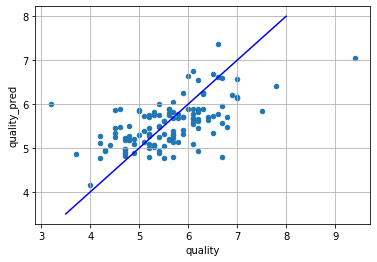

In [0]:
import matplotlib.pyplot as plt
#qualityと予測の散布図
X_conf_rfr = X_test.copy()
X_conf_rfr['quality'] = y_test
X_conf_rfr['quality_pred'] = pred_test
X_conf_rfr.plot.scatter(x='quality', y='quality_pred', grid=True)
plt.plot([3.5, 8], [3.5, 8], c="blue")  #直線の描画
plt.show()

#6．提出ファイルの作成

In [0]:
#本番データ
X_pred = test[list(best_factor)]
y_pred = model.predict(X_pred)
#提出ファイルの保存
X_pred['quality'] = y_pred
submission = pd.DataFrame(X_pred['quality'])
path = "/content/gdrive/My Drive/Colab Notebooks/GCI2019/competition2/results/"
submission.to_csv(path + 'Submission_BF3.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#7．テスト


In [0]:
#初期値の設定
best_score = 0
best_size = 0
best_factor = ""
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
for i in a_list[::-1]: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    #print('current check: ', j)
    #実際の抽出
    x = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
    #n個の組み合わせ毎に一番良い値とその時のテストサイズを抽出
    better_score = 0 #n個の組み合わせの計算毎にリセットされる
    better_size = 0
    better_factor = ""
    for size in test_size:
      #この辺にgridsearch
      X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=size, random_state=0)
      model = RandomForestRegressor(random_state=42)
      model.fit(X_train, y_train)
      pred_test = model.predict(X_test)
      #print(size, j)
      if better_score == 0:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
      elif mean_squared_error(y_test, pred_test) < better_score:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
    print('better_size: ', better_size, 'better_score(mse): ', better_score, 'better_factor: {}'.format(j))
    if best_score == 0:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    if better_score < best_score:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor    #n個の組み合わせ毎の計算が終わったら、最善の結果を出力する
print('best_size: ', best_size, 'best_score(mse): ', best_score)

better_size:  0.1 better_score(mse):  0.5425500234374996 better_factor: ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
better_size:  0.1 better_score(mse):  0.5796771562499997 better_factor: ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates')
better_size:  0.1 better_score(mse):  0.6382611640624997 better_factor: ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol')
better_size:  0.1 better_score(mse):  0.5412802812499996 better_factor: ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol')
better_size:  0.1 better_score(mse):  0.52641126562499

better_size:  0.1 better_score(mse):  0.5128873203125 better_factor: ('fixed acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')


In [0]:
a_list

In [0]:
#初期値の設定
best_score = 0
best_size = 0
best_factor = ""
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
#上の組み合わせ毎で訓練データを抽出
for i in a_list: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    print('current check: ', j)
    #実際の抽出
    x = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
    #n個の組み合わせ毎に一番良い値とその時のテストサイズを抽出
    better_score = 0 #n個の組み合わせの計算毎にリセットされる
    better_size = 0
    better_factor = ""
    for size in test_size:
      #この辺にgridsearch
      X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=size, random_state=0)
      model = RandomForestRegressor(random_state=42)
      model.fit(X_train, y_train)
      pred_test = model.predict(X_test)
      if better_score == 0:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
      elif mean_squared_error(y_test, pred_test) < better_score:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
    #n個の組み合わせ毎の計算が終わったら、最善の結果を出力する
    print('better_size: ', better_size, 'better_score(mse): ', better_score)
    if best_score == 0:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    if better_score < best_score:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
print('best_size: ', best_size, 'best_factor: ', best_factor, 'best_score(mse): ', best_score)

current check:  ('fixed acidity',)
better_size:  0.1 better_score(mse):  0.8184283777129412
current check:  ('volatile acidity',)
better_size:  0.1 better_score(mse):  0.8154141832508807
current check:  ('citric acid',)
better_size:  0.1 better_score(mse):  0.8094109608349318
current check:  ('residual sugar',)
better_size:  0.1 better_score(mse):  0.8073839955868758
current check:  ('chlorides',)
better_size:  0.1 better_score(mse):  0.8331435681431161
current check:  ('free sulfur dioxide',)
better_size:  0.1 better_score(mse):  0.9475282726538752
current check:  ('total sulfur dioxide',)
better_size:  0.25 better_score(mse):  1.065729188458017
current check:  ('density',)
better_size:  0.25 better_score(mse):  1.0566088853071212
current check:  ('pH',)
better_size:  0.1 better_score(mse):  0.8325704955995753
current check:  ('sulphates',)
better_size:  0.1 better_score(mse):  0.7379608598482652
current check:  ('alcohol',)
better_size:  0.1 better_score(mse):  0.6629797621295095
cur

KeyboardInterrupt: ignored

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.tree import  DecisionTreeClassifier

#初期値の設定
best_score = 0
best_size = 0
best_factor = ""
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
#上の組み合わせ毎で訓練データを抽出
for i in a_list: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    print('current check: ', j)
    #実際の抽出
    X = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
    #n個の組み合わせ毎に一番良い値とその時のテストサイズを抽出
    better_score = 0 #n個の組み合わせの計算毎にリセットされる
    better_size = 0
    better_factor = ""
    for size in test_size:
      #この辺にgridsearch
      
      X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=size, random_state=0)
      model = RandomForestRegressor(random_state=42)
      model.fit(X_train, y_train)
      pred_test = model.predict(X_test)
      if better_score == 0:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
      elif mean_squared_error(y_test, pred_test) < better_score:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
    #n個の組み合わせ毎の計算が終わったら、最善の結果を出力する
    print('better_size: ', better_size, 'better_score(mse): ', better_score)
    if best_score == 0:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    if better_score < best_score:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    
    model = [RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)]
    params = {
              RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42):{'max_depth': [3, 5, 7],'min_samples_leaf': [1, 2, 4]},
            }
    #size=>model=>paramsの流れ
    print('size: {}'.format(size))
    print('model: {}'.format(model))
    for param in params:
      #print(param)
      #print(params[param])
      #print(size) #0.1=>10, 0.2=>5, 0.25=>4, 0.5=>2

      grid = GridSearchCV(param, params[param], cv=int(1/size))
      grid.fit(X, y) 
      pred_grid = grid.predict(X) 

    print('Best Parameters: {}'.format(grid.best_params_))
    print('Best Score: {}'.format(mean_squared_error(y, pred_grid)))

current check:  ('fixed acidity',)
better_size:  0.1 better_score(mse):  0.857676923419193
size: 0.1
model: [RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)]
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2}
Best Score: 0.9283943381996892
current check:  ('volatile acidity',)
better_size:  0.1 better_score(mse):  0.857676923419193
size: 0.1
model: [RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_imp

KeyboardInterrupt: ignored

In [0]:
#test2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.tree import  DecisionTreeClassifier

#初期値の設定
best_score = 0
best_size = 0
best_factor = ""
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
#上の組み合わせ毎で訓練データを抽出
for i in a_list: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    print('current check: ', j)
    #実際の抽出
    X = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
    #n個の組み合わせ毎に一番良い値とその時のテストサイズを抽出
    better_score = 0 #n個の組み合わせの計算毎にリセットされる
    better_size = 0
    better_factor = ""
    for size in test_size:
      X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=size, random_state=0)
      model = RandomForestRegressor(random_state=42)
      model.fit(X_train, y_train)
      pred_test = model.predict(X_test)
      if better_score == 0:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
      elif mean_squared_error(y_test, pred_test) < better_score:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
    #n個の組み合わせ毎の計算が終わったら、最善の結果を出力する
    print('better_size: ', better_size, 'better_score(mse): ', better_score)
    if best_score == 0:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    if better_score < best_score:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    
        model = [RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)]
        params = {
                  RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42):{'max_depth': [3, 5, 7],'min_samples_leaf': [1, 2, 4]},
                }
        #size=>model=>paramsの流れ
        print('size: {}'.format(size))
        print('model: {}'.format(model))
        for param in params:
          #print(param)
          #print(params[param])
          #print(size) #0.1=>10, 0.2=>5, 0.25=>4, 0.5=>2

          grid = GridSearchCV(param, params[param], cv=int(1/size))
          grid.fit(X, y) 
          pred_grid = grid.predict(X) 

        print('Best Parameters: {}'.format(grid.best_params_))
        print('Best Score: {}'.format(mean_squared_error(y, pred_grid)))

In [0]:
#テスト３
a_list = []
#説明変数の抽出
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
#上の組み合わせ毎で訓練データを抽出
for i in a_list: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    print('current check: ', j)
    #実際の抽出
    X = train[list(j)]
    y = train['quality']
    #モデルの選択
    models = [RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)]
    #HPの選択
    params = {
              RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42):{'max_depth': [3, 5, 7],'min_samples_leaf': [1, 2, 4]},
              }
    param_grid = {'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}
    #CVの選択
    cv = [3,4,5,10]
    for i in cv:
      grid = GridSearchCV(models, param_grid, cv=i)
    #説明変数に対するベストを表示
      grid.fit(X, y)
      pred_grid = grid.predict(X)
      print('current_cv: {}'.format(i))
    #print('Best Parameters: {}'.format(grid.best_params_))
    #print('CV Score(mse): {}'.format(mean_squared_error(y, pred_grid)))

#テスト2期

#定義

In [0]:
def X_arr(train, test):
    import numpy as np
    #説明変数のリストを作って、説明変数を抽出
    X_list = []
    #説明変数の抽出
    for i in range(1, len(test.columns)+1):
      X = list(itertools.combinations(test.columns, i))
      for a in X:
        X_list.append(a)
    X_arr = np.array(X_list)
    return X_arr

In [0]:
#説明変数の総当り組み合わせ
X_arr = X_arr(train, test)


In [0]:
for i in X_arr: #iはn個抽出した時の項目の組み合わせを格納
    #print('current check: ', i)
    #実際の抽出
    X = train[list(i)]
    y = train['quality']

In [0]:
def Xandy(X_arr):

In [0]:
from sklearn.linear_model import LinearRegression

#初期値の設定
best_score = 0
best_size = 0
best_factor = ""
a_list=[]
#抽出するデータ項目の全組み合わせ
for i in range(1, len(test.columns)+1):
  a = list(itertools.combinations(test.columns, i))
  #print(i, a)
  a_list.append(a)
#上の組み合わせ毎で訓練データを抽出
for i in a_list: #iはn個抽出した時の項目の組み合わせを格納
  for j in i: #jはiの組み合わせを1組ずつ抽出
    #print('current check: ', j)
    #実際の抽出
    X = train[list(j)]
    y = train['quality']

    test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
    #n個の組み合わせ毎に一番良い値とその時のテストサイズを抽出
    better_score = 0 #n個の組み合わせの計算毎にリセットされる
    better_size = 0
    better_factor = ""
    for size in test_size:
      X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=size, random_state=0)
      #models = [RandomForestRegressor(random_state=42), LinearRegression()]
      model = LinearRegression()
      model.fit(X_train, y_train)
      pred_test = model.predict(X_test)
      score =  mean_squared_error(y_test, pred_test)
      size =  size
      factor = j
      print('size: {}'.format(size), 'score(mse): {}'.format(score), 'factor: {}'.format(factor))
      if better_score == 0:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
      elif mean_squared_error(y_test, pred_test) < better_score:
        better_score = mean_squared_error(y_test, pred_test)
        better_size = size
        better_factor = j
      
  #n個の組み合わせ毎の計算が終わったら、最善の結果を出力する
    print('better_size: ', better_size, 'better_score(mse): ', better_score, 'better_factor: {}'.format(better_factor))
    if best_score == 0:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
    if better_score < best_score:
        best_score = better_score
        best_size = better_size
        best_factor = better_factor
print('best_size: ', best_size, 'best_score(mse): ', best_score, 'best_factor: ', best_factor)

NameError: ignored

In [0]:
test_size = [0.5, 0.3, 0.25, 0.2, 0.1]
for size in test_size:
  X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, random_state=0)